# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Clean Code
## Function and Results

# 01 Data import, Features name cleaning and first exploration
<div class="alert alert-block alert-info">
<b>info:</b> Here a function is defined. 
    The data is cleaned and prepared for a first analysis and then clean again until the complete function was built
</div>

In [3]:
#Function to clean the data
def DATA_FRAME_CLEAN(data_frame_input):
    #Print size of dataframe
    print('The size for this data frame is: ', data_frame_input.shape)
    
    #Standarize column names
    cols = [col_name.upper().replace(' ', '_') for col_name in data_frame_input.columns]
    data_frame_input.columns = cols
    
    #Clean Variables
    #Fix weigth
    data_frame_input['WEIGHT'] = data_frame_input['WEIGHT'].str.rstrip('lbs').astype(int)
    #Fix heigth
    data_frame_input['HEIGHT'] = data_frame_input['HEIGHT'].str.replace('\'', '.').str.replace('"', '').astype(float)
    
    data_frame_input['IR'] = data_frame_input['IR'].str.replace('★', '').astype(float)
    data_frame_input['W/F'] = data_frame_input['W/F'].str.replace('★', '').astype(float)
    data_frame_input['SM'] = data_frame_input['SM'].str.replace('★', '').astype(float)
    
    #Fix Money related variables
    ## multiply the numeric values by 1 million or 1 thousand, depending on whether the value represents millions or thousands of euros
    data_frame_input["VALUE"] = data_frame_input["VALUE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
   
    #WAGE
    data_frame_input["WAGE"] = data_frame_input["WAGE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
  
    
    #RELEASE_CLAUSE
    data_frame_input["RELEASE_CLAUSE"] = data_frame_input["RELEASE_CLAUSE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

    
    #Fixed values with a + as a , separator
    cols_to_replace = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']
    #Some values contains a -
    #data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].str.replace('-'', '').str.replace('"', '')
    data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].apply(lambda x: x.str.replace('+', '.'))

    #Convert HITS to numeric
    # Remove the "K" character and convert to numeric
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'].str.replace('K', '', regex=False)) * 1000
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'])
    
    #Convert ID to string
    data_frame_input['ID'] = data_frame_input['ID'].astype(str)
    
    #Clean nulls
    #Select numeric columns
    df_numeric=data_frame_input.select_dtypes(include=["float", "int"]) 
    null_columns = df_numeric.columns[df_numeric.isna().sum() != 0].tolist()
    print("\n\n\nNumerical columns that contains null values: \n ",null_columns,"\n\n\n")
    #Put 0 in those which have nulls.
    #for  Column_to_change in null_columns:
        #df_numeric[Column_to_change] = df_numeric[Column_to_change].fillna(0) 
    
    #Select Object Variables
    df_object=data_frame_input.select_dtypes(include=[object]) 
    null_columns = df_object.columns[df_object.isna().sum() != 0].tolist()
    print("Categorical columns that contains null values: \n ",null_columns, "\n nulls have been replaced with Unkown label\n\n\n")
    #Put Unkwon in those which have nulls.
    for  Column_to_change in null_columns:
        df_object[Column_to_change] = df_object[Column_to_change].fillna('Unknown') 
    
    #Merge both branches
    data_frame_input=pd.concat([df_numeric,df_object],axis=1)
    #print(data_frame_input.columns)
    
    #Change EFFECTIVE_TO_DATE to date type
    #data_frame_input['EFFECTIVE_TO_DATE'] = pd.to_datetime(data_frame_input['EFFECTIVE_TO_DATE'])
    
    #Rename columns
    data_frame_input = data_frame_input.rename(columns={'OVA': 'OVERALL', 'BOV': 'BEST_OVERALL','LS': 'LEFT_STRIKER','ST':'LEFT_STRIKER',
                           'RS':'RIGHT_STRIKER','LW':'LEFT_WING','LF':'LEFT_FORWARD','CF':'CENTRAL_FORWARD','RF':'RIGHT_FORWARD',
                            'RW':'RIGHT_WING','LAM':'LEFT_ATTACKING_MIDFIELDER','CAM':'CENTRAL_ATTACKING_MIDFILEDER','RAM':'RIGHT_ATTACKING_MIDFIELDER',
                           'LM':'LEFT_MIDFIELDER','LCM':'LEFT_CENTRAL_MIDFIELDER','CM':'CENTRAL_MIDFIELDER','RCM':'RIGHT_CENTRAL_MIDFIELDER','RM':'RIGHT_MIDFIELDER',
                           'LWB':'LEFT_WING_BACK','LDM':'LEFT_DEFFENSIVE_MIDFIELDER','CDM':'CENTRAL_DEFENSIVE_MIDFIELDER','RDM':'RIGHT_DEFENSIVE_MIDFIELDER',
                           'RWB':'RIGHT_WING_BACK','LB':'LEFT_BACK','LCB':'LEFT_CENTRAL_BACK','CB':'CENTRAL_BACK','RCB':'RIGHT_CENTRAL_BACK','RB':'RIGHT_BACK',
                           'GK':'GOAL_KEEPER','BP':'BEST_POSITION','FK_ACCURACY':'FREE_KICK_ACCURACY','A/W':'ATTACKING_WORK_RATE','D/W':'DEFENSIVE_WORK_RATE','SM':'SKILL_MOVES','W/F':'WEEK_FOOT_ABILITY','SHO':'SHOOTING',
                           'POT':'POTENTIAL'})
    
    #Assign to ouput
    data_frame_output=data_frame_input
    
    #Print info for the dataframe
    print('\n\n\nDescription of output data frame \n')
    data_frame_output.info(
    )
    return data_frame_output

Import the data and apply the function

In [4]:
#Here I use the function created to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./fifa21_male2.csv')
#data_frame_input.shape
df_cleaned=DATA_FRAME_CLEAN(data_frame_input)
df_cleaned.sample(10)

The size for this data frame is:  (17125, 107)



Numerical columns that contains null values: 
  ['VOLLEYS', 'CURVE', 'AGILITY', 'BALANCE', 'JUMPING', 'INTERCEPTIONS', 'POSITIONING', 'VISION', 'COMPOSURE', 'SLIDING_TACKLE', 'HITS'] 



Categorical columns that contains null values: 
  ['CLUB', 'POSITION', 'CLUB_LOGO', 'JOINED', 'LOAN_DATE_END', 'A/W', 'D/W'] 
 nulls have been replaced with Unkown label






Description of output data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, AGE to GENDER
dtypes: float64(15), int32(4), int64(44), object(44)
memory usage: 13.7+ MB


AGE  OVERALL  BEST_OVERALL  POTENTIAL  HEIGHT  WEIGHT  GROWTH    VALUE  \
5359    24       66            67         71    5.11     150       5   775000   
11234   25       71            73         76    6.10     170       5  3100000   
9022    28       72            72         72    5.11     203       0  3200000   
15556   23       60            60         68    6.20     165       8   240000   
9915    24       66            67         73    5.10     168       7   825000   
11379   27       69            69         69    5.70     150       0   925000   
9403    22       62            62         72    6.30     198      10   375000   
6568    22       60            60         64    6.00     150       4   160000   
5350    30       64            64         64    5.11     168       0   375000   
2648    30       74            74         74    6.00     190       0  4600000   

        WAGE  RELEASE_CLAUSE  ATTACKING  CROSSING  FINISHING  \
5359    2000         1400000        301        60         56   
11234   6000         4900000        302        60         55   
9022   21000         6100000        339        42         73   
15556   2000          552000         69        11          8   
9915    1000         1600000        290        60         61   
11379    500         2000000        236        66         31   
9403    2000          544000         66        11          7   
6568    2000               0        260        53         52   
5350    5000          619000        290        57         43   
2648     500        10100000        292        67         46   

       HEADING_ACCURACY  SHORT_PASSING  VOLLEYS  SKILL  DRIBBLING  CURVE  \
5359                 52             67     66.0    328         63   68.0   
11234                68             75     44.0    308         72   56.0   
9022                 76             71     77.0    304         63   63.0   
15556                15             26      9.0     82         15   13.0   
9915                 65             69     35.0    292         66   47.0   
11379                60             49     30.0    238         66   34.0   
9403                 10             29      9.0     79         10   13.0   
6568                 60             57     38.0    234         53   36.0   
5350                 60             65     65.0    300         65   45.0   
2648                 70             72     37.0    312         60   66.0   

       FREE_KICK_ACCURACY  LONG_PASSING  BALL_CONTROL  MOVEMENT  ACCELERATION  \
5359                   67            65            65       342            64   
11234                  37            70            73       343            71   
9022                   52            53            73       297            53   
15556                  14            24            16       150            23   
9915                   48            63            68       305            60   
11379                  44            26            68       344            71   
9403                   10            31            15       165            16   
6568                   35            55            55       335            68   
5350                   67            60            63       327            66   
2648                   51            67            68       350            71   

       SPRINT_SPEED  AGILITY  REACTIONS  BALANCE  POWER  SHOT_POWER  JUMPING  \
5359             68     70.0         65     75.0    334          68     58.0   
11234            74     70.0         72     56.0    331          62     68.0   
9022             53     68.0         67     56.0    373          86     68.0   
15556            31     20.0         40     36.0    165          45     41.0   
9915             65     56.0         65     59.0    314          60     61.0   
11379            67     55.0         65     86.0    286          55     65.0   
9403             31     26.0         56     36.0    174          46     63.0   
6568             74     64.0         57  

# 02 Exploration
## Here I separate numerical and categorical features. 
 - df_numeric
 - df_object
### The next step is to show results for Categorical and Numerical features

In [5]:
df_numeric=df_cleaned.select_dtypes(include=["float", "int"])
df_object=df_cleaned.select_dtypes(include=[object]) 

#Drop ID
#df_numeric.drop(columns='ID')#Why not working?????????????????????????????????????????????????
#df_numeric.sample(2)

#### Categorical features
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see unique values and a count of how many records in each category are. 
</div>

In [5]:
#Check unique values for each categorical value
for column in df_object.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  ID  has  17125  categories 
 The single values are:  ['2' '16' '27' ... '259091' '259101' '259105']
Here the detail: 
 2         1
239575    1
239523    1
239529    1
239540    1
         ..
212513    1
212516    1
212518    1
212519    1
259105    1
Name: ID, Length: 17125, dtype: int64



This feature  NAME  has  16176  categories 
 The single values are:  ['G. Pasquale' 'Luis García' 'J. Cole' ... 'C. Barrett' 'J. Gazibegović'
 'Pablo Rodríguez']
Here the detail: 
 J. Rodríguez       10
A. Traoré           8
J. Rojas            8
J. Jones            7
Paulinho            7
                   ..
F. Ondoa            1
K. Opare            1
T. Abe              1
N. Stark            1
Pablo Rodríguez     1
Name: NAME, Length: 16176, dtype: int64



This feature  NATIONALITY  has  167  categories 
 The single values are:  ['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina'

AttributeError: 'DataFrame' object has no attribute 'unique'

#### Numerical features

#### Histograms
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the histogram of the different numeric variables 
</div>

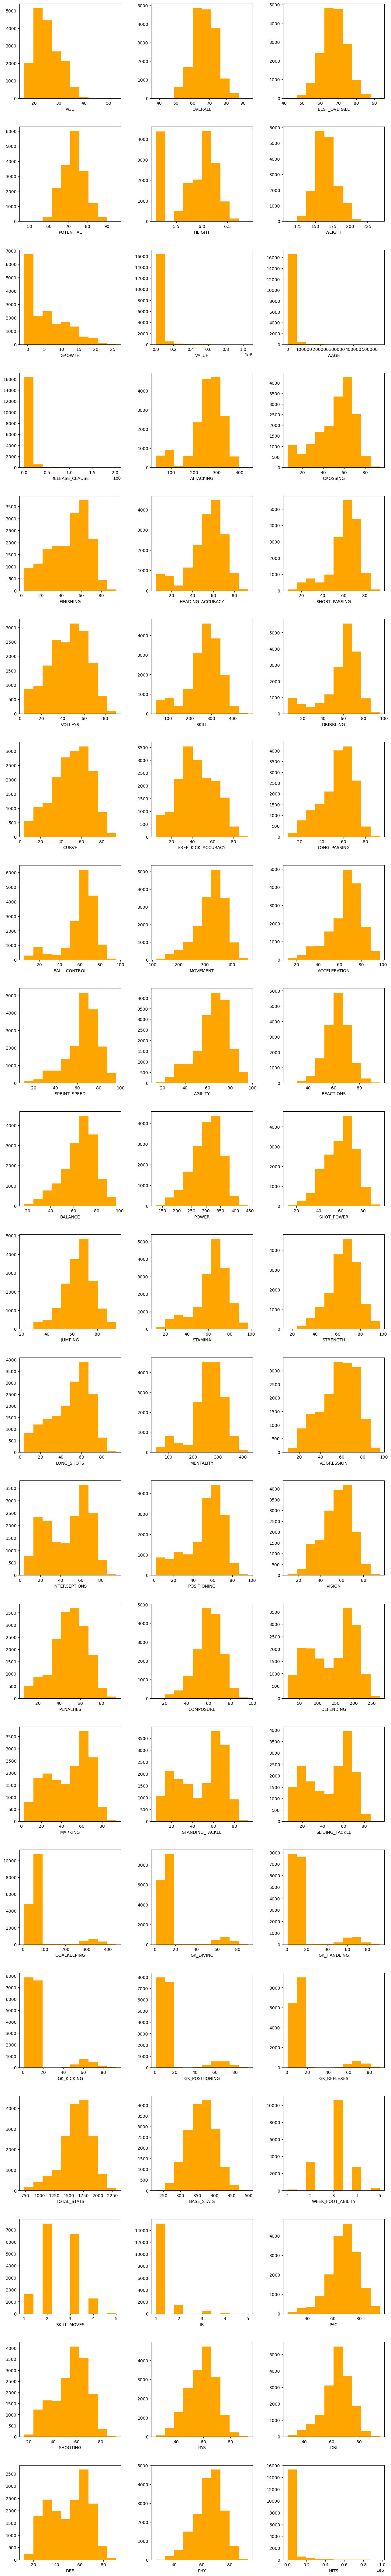

In [6]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each histogram in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.hist(df_numeric[column], color='orange')
    ax.set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

#### Distributions
#### Histograms
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the distributions of the different numeric variables 
</div>

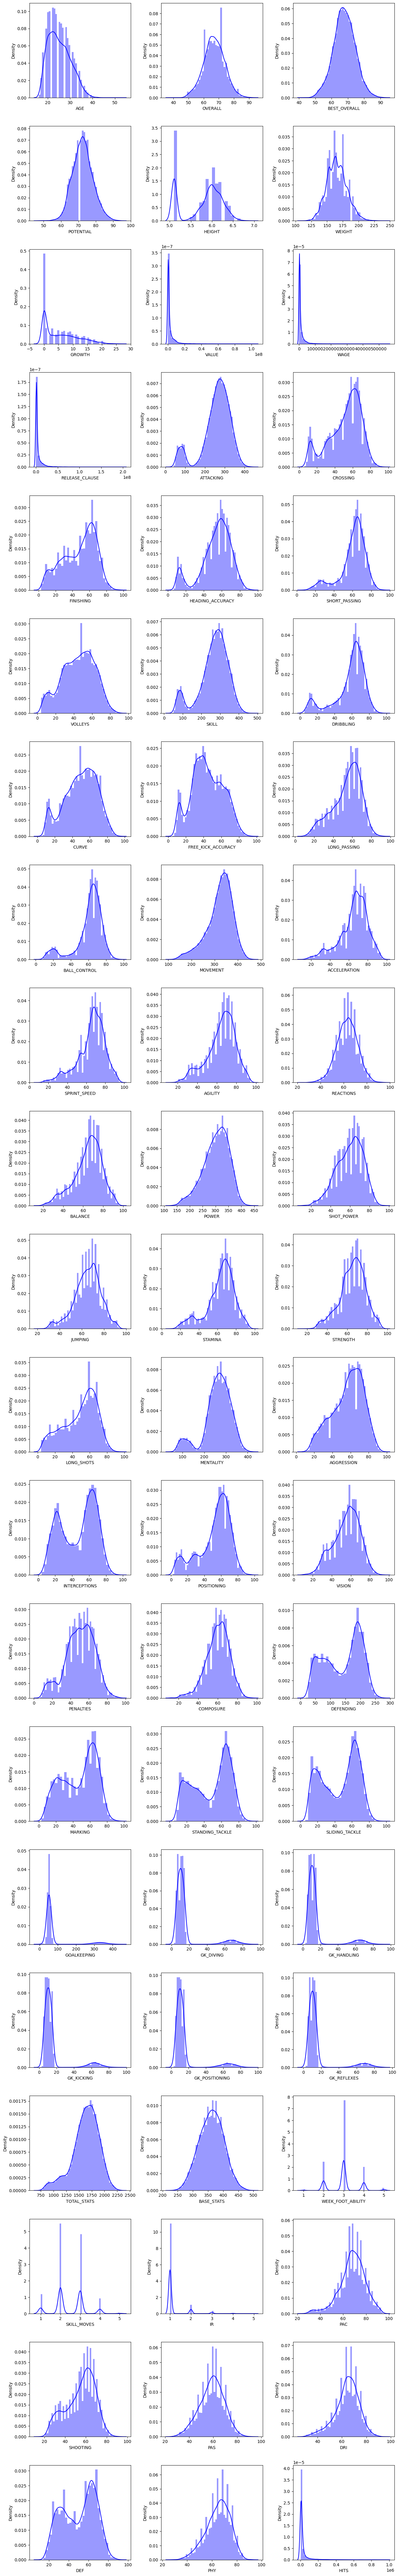

In [7]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

#### boxplots
#### Histograms
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the boxplots of the different numeric variables 
</div>

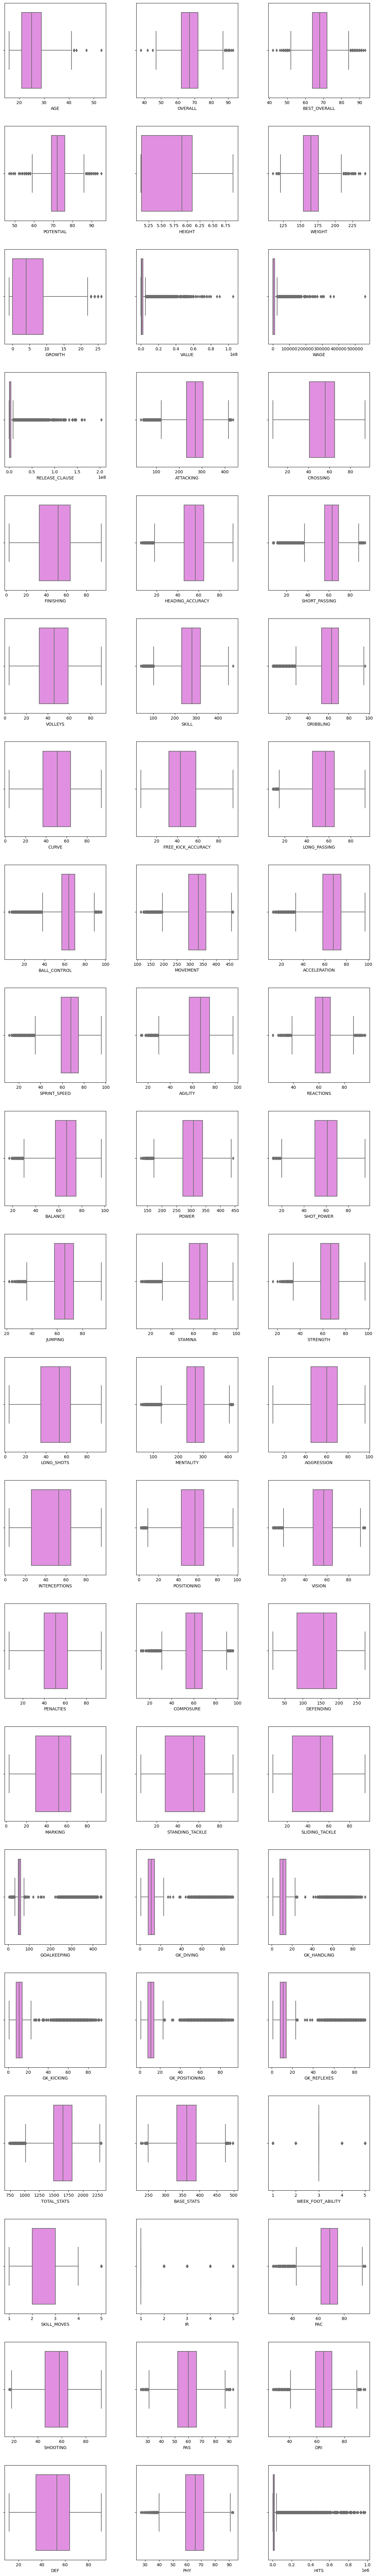

In [8]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

Details about the limits and the outlyers for each numeric variable
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the details on the different numeric variables 
</div>

In [9]:
for column in df_numeric.columns:
    iqr = np.percentile(df_numeric[column],75) - np.percentile(df_numeric[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(df_numeric[column],75) + 1.5*iqr
    lower_limit = np.percentile(df_numeric[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(df_numeric.loc[(df_numeric[column]>upper_limit) | (df_numeric[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)
    #print(X_num.where((X_num[X_num[column]]<lower_limit) and (X_num[X_num[column]]>lower_limit)).shape())


Feature name:  AGE  | Upper limit:  41.0  | Lower limit:  9.0
Number of exclusions would be  13

Feature name:  OVERALL  | Upper limit:  87.0  | Lower limit:  47.0
Number of exclusions would be  32

Feature name:  BEST_OVERALL  | Upper limit:  84.0  | Lower limit:  52.0
Number of exclusions would be  251

Feature name:  POTENTIAL  | Upper limit:  86.5  | Lower limit:  58.5
Number of exclusions would be  298

Feature name:  HEIGHT  | Upper limit:  7.584999999999999  | Lower limit:  3.6250000000000013
Number of exclusions would be  0

Feature name:  WEIGHT  | Upper limit:  209.0  | Lower limit:  121.0
Number of exclusions would be  82

Feature name:  GROWTH  | Upper limit:  22.5  | Lower limit:  -13.5
Number of exclusions would be  51

Feature name:  VALUE  | Upper limit:  5437500.0  | Lower limit:  -2662500.0
Number of exclusions would be  2304

Feature name:  WAGE  | Upper limit:  26000.0  | Lower limit:  -14000.0
Number of exclusions would be  1751

Feature name:  RELEASE_CLAUSE  | U

---
#### Correlations

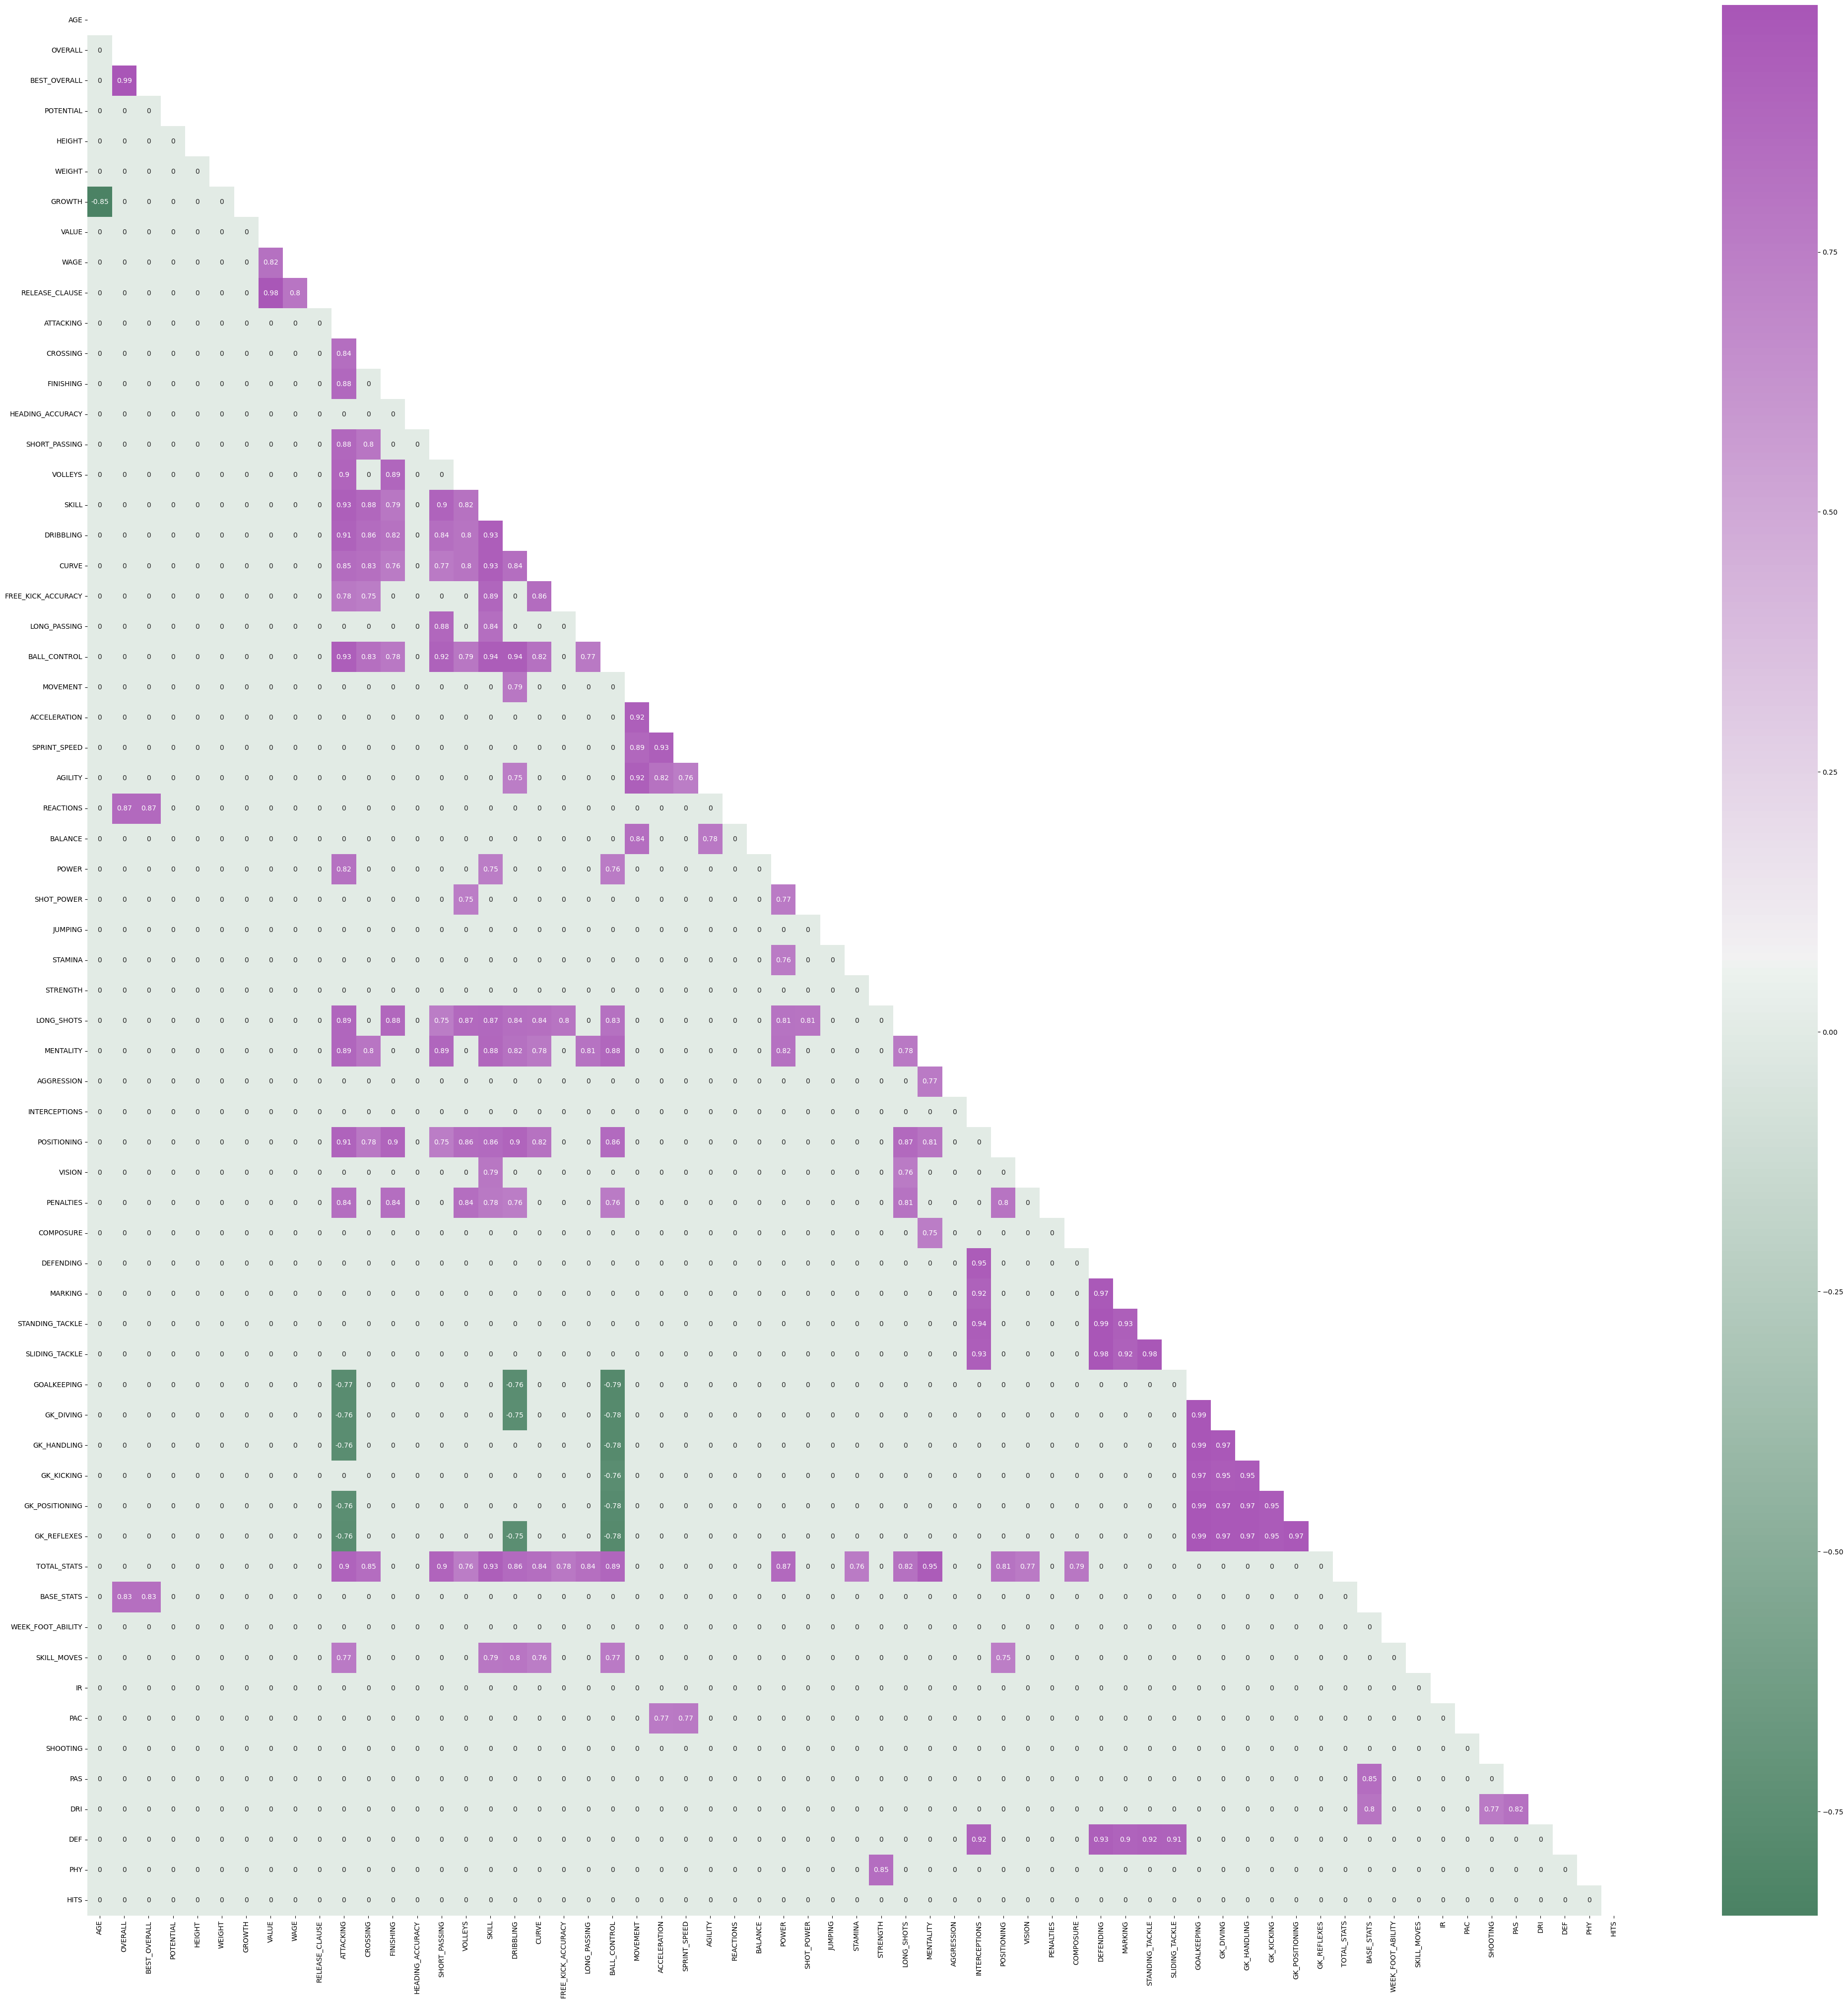

In [10]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric.corr()
correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50, 50))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

---
<div class="alert alert-block alert-info">
<b>Important:</b> Here we start to prepare the data for the training 
</div>

##  Select variables relevant for the model
### Categoricals
    -BEST_POSITION
    -FOOT
### Numericals
    -AGE
    -OVERALL
    -VALUE
    -POTENTIAL
    -HEIGHT
    -WEIGHT
    -GROWTH
    

<div class="alert alert-block alert-success">
<b>Tip:</b> To a detail explanations about the decisions made. Check excel 
</div>

In [12]:
df_object_selected=df_object[['BEST_POSITION','FOOT','ATTACKING_WORK_RATE','DEFENSIVE_WORK_RATE']]
df_numeric_selected=df_numeric[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT', 'GROWTH','SKILL_MOVES','WEEK_FOOT_ABILITY']]
#df_MODEL=pd.concat([df_object_selected, df_numeric_selected], axis=1)
#df_MODEL.reset_index()
#df_MODEL.shape

---
#### Check unique values in Selected Categorical features
>We don´t want to have so many unique values. Columns are costly. Max 2,3 unique values per feature

<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see unique values and a count of how many records in each category are. 
</div>

In [8]:
#Check unique values for each categorical value
for column in df_object_selected.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  BEST_POSITION  has  15  categories 
 The single values are:  ['LWB' 'CM' 'CAM' 'ST' 'RW' 'CB' 'CF' 'GK' 'CDM' 'RWB' 'LB' 'LM' 'RM' 'RB'
 'LW']
Here the detail: 
 CB     3252
ST     2660
CAM    2246
GK     1576
RM     1404
CDM    1246
CM      990
LB      921
RB      894
LM      805
RW      329
LWB     252
RWB     252
LW      209
CF       89
Name: BEST_POSITION, dtype: int64



This feature  FOOT  has  2  categories 
 The single values are:  ['Left' 'Right']
Here the detail: 
 Right    12906
Left      4219
Name: FOOT, dtype: int64



This feature  ATTACKING_WORK_RATE  has  4  categories 
 The single values are:  ['Medium' 'Unknown' 'High' 'Low']
Here the detail: 
 Medium     11044
High        5143
Low          849
Unknown       89
Name: ATTACKING_WORK_RATE, dtype: int64



This feature  DEFENSIVE_WORK_RATE  has  4  categories 
 The single values are:  ['High' 'Medium' 'Low' 'Unknown']
Here the detail: 
 Medium     12225
High        3017
Low         1794
Unknown       89
Nam

---
#### Check  values in Selected Numerical features
>We need to test which distribution the variables have and decide the transformation we use. 
>We should remove fetautures with a strong correlation for a linear regression
>In case of a logaritmit regression we don´t need to transform variables

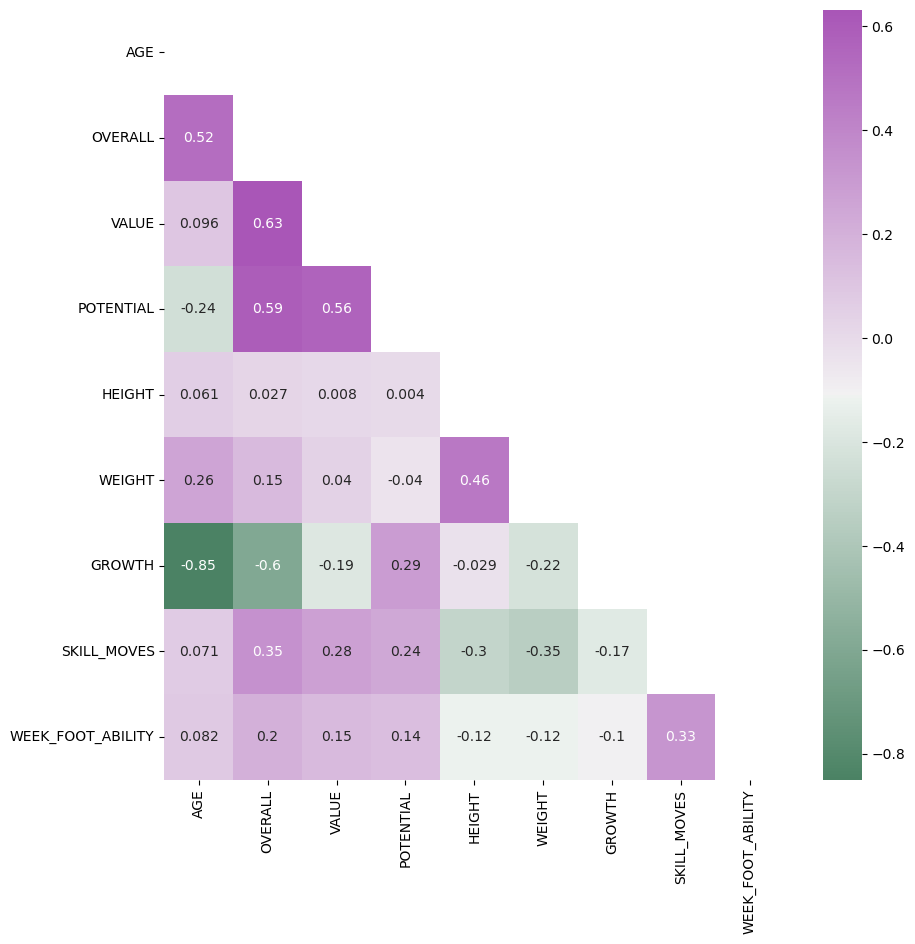

In [13]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric_selected.corr()
#correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

Explanations for this graph: 
>We have selected variables with low correlation
>Please check if we need Growth is correlated with age. Not bigger than 0.9 it should be ok. 
>Value is our target

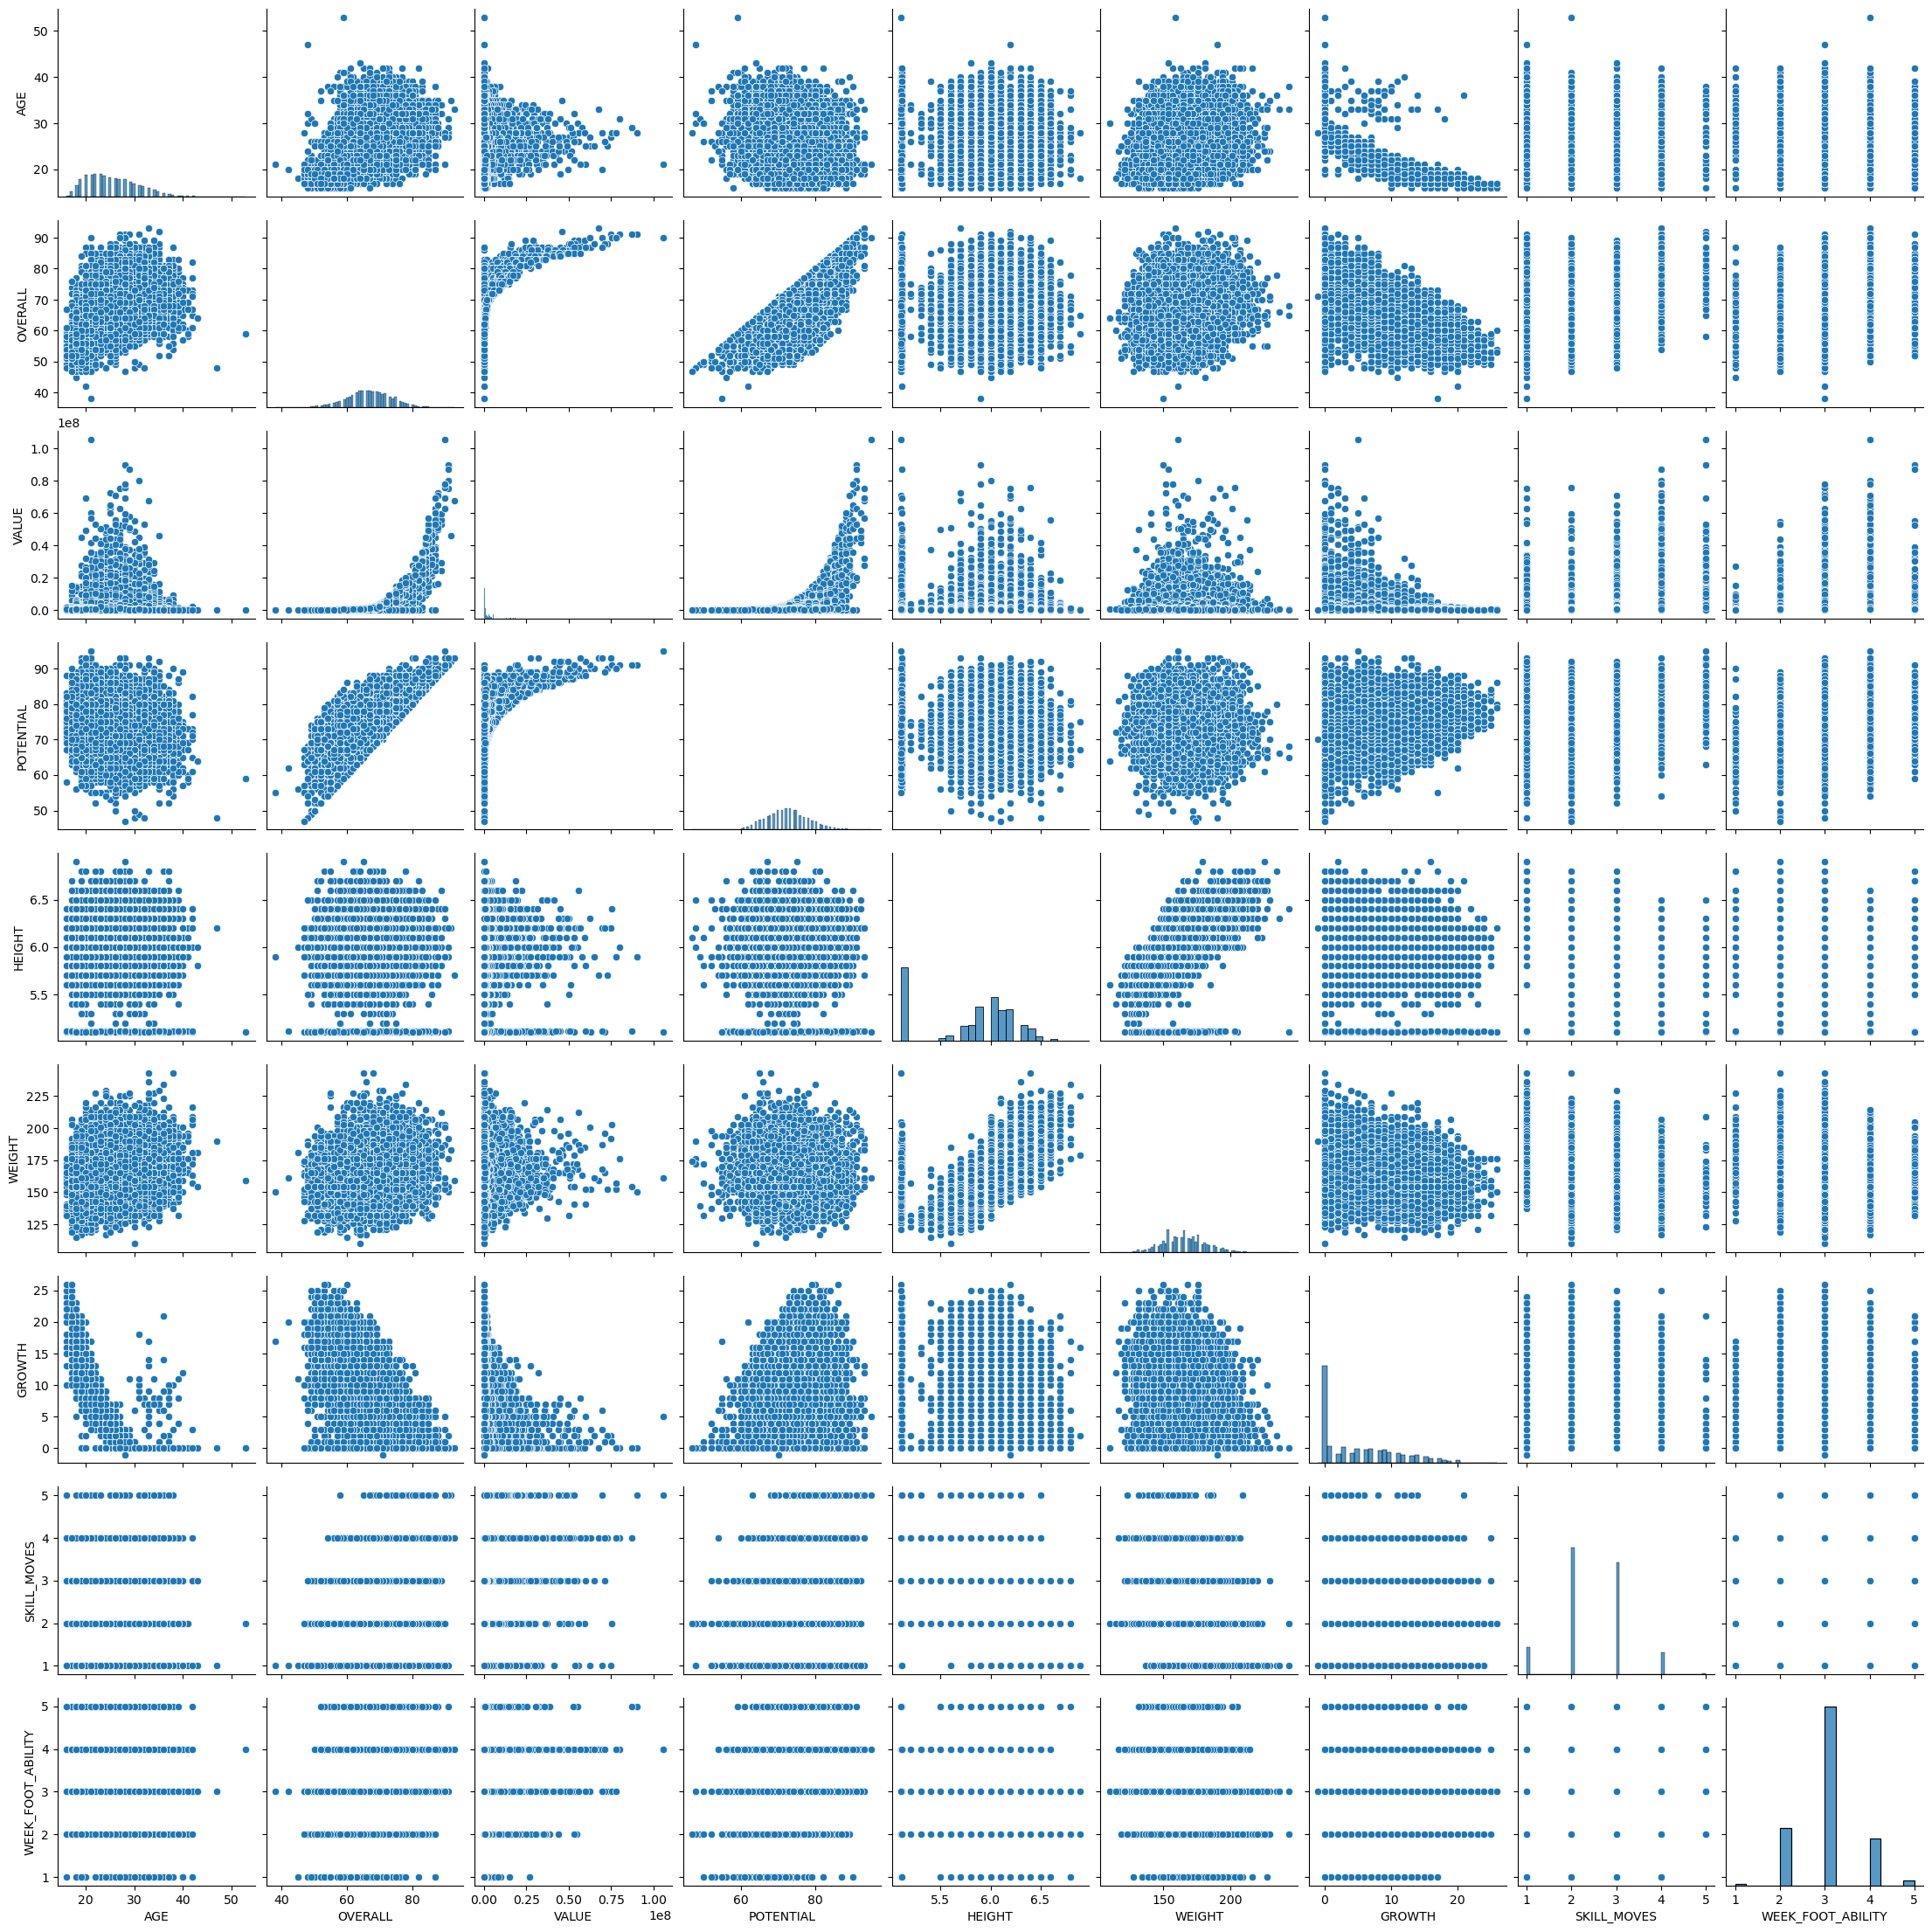

In [14]:
sns.pairplot(df_numeric_selected)

# 03 Process / Transformations

## Encoding


We Encode the BEST_POSITION feature to keep the most relevant categories. In total they are four

In [15]:
# Create a dictionary that maps old categories to new categories
bp_mapping = {
    "GK": "GOAL KEEPER",
    "ST": "FORWARD",
    "CF": "FORWARD",
    "RW": "FORWARD",
    "LW": "FORWARD",
    "CAM": "MIDFIELD",
    "CM": "MIDFIELD",
    "RM": "MIDFIELD",
    "LM": "MIDFIELD",
    "CDM": "MIDFIELD",
    "CB": "DEFENSIVE",
    "LWB": "DEFENSIVE",
    "RWB": "DEFENSIVE",
    "LB": "DEFENSIVE",
    "RB": "DEFENSIVE",
}
# Use the replace() method to map old categories to new categories
df_object_selected["BEST_POSITION"] = df_object_selected["BEST_POSITION"].replace(bp_mapping)
#df_object_selected.head()
df_object_selected["BEST_POSITION"].unique()

array(['DEFENSIVE', 'MIDFIELD', 'FORWARD', 'GOAL KEEPER'], dtype=object)

In [16]:
df_object_encoded = pd.get_dummies(df_object_selected, drop_first=False)
df_object_encoded.sample(5)

BEST_POSITION_DEFENSIVE  BEST_POSITION_FORWARD  \
4953                         0                      1   
8358                         0                      0   
11890                        0                      0   
7912                         1                      0   
4033                         0                      1   

       BEST_POSITION_GOAL KEEPER  BEST_POSITION_MIDFIELD  FOOT_Left  \
4953                           0                       0          0   
8358                           0                       1          1   
11890                          0                       1          0   
7912                           0                       0          0   
4033                           0                       0          0   

       FOOT_Right  ATTACKING_WORK_RATE_High  ATTACKING_WORK_RATE_Low  \
4953            1                         1                        0   
8358            0                         1                        0   
11890           1                         1                        0   
7912            1                         0                        0   
4033            1                         0                        0   

       ATTACKING_WORK_RATE_Medium  ATTACKING_WORK_RATE_Unknown  \
4953                            0                            0   
8358                            0                            0   
11890                           0                            0   
7912                            1                            0   
4033                            1                            0   

       DEFENSIVE_WORK_RATE_High  DEFENSIVE_WORK_RATE_Low  \
4953                          0                        0   
8358                          0                        0   
11890                         0                        0   
7912                          0                        0   
4033                          0                        1   

       DEFENSIVE_WORK_RATE_Medium  DEFENSIVE_WORK_RATE_Unknown  
4953                            1                            0  
8358                            1                            0  
11890                           1                            0  
7912                            1                            0  
4033                            0                            0

## Scalers

<div class="alert alert-block alert-danger">
<b>Danger:</b> We separate first target and the rest of the variables. Is this true?
</div>

The distributions and the outliers for the selected variables are plotted here. This helps us to decide if we need a normalization or a standarization

In [20]:
#I split VALUEt and the rest of numerical values to apply the scalers
X_Target=df_numeric_selected['VALUE']
df_numeric_vars=df_numeric_selected.drop(columns='VALUE')
df_numeric_vars.sample(4)

AGE  OVERALL  POTENTIAL  HEIGHT  WEIGHT  GROWTH  SKILL_MOVES  \
14212   19       54         73     6.1     154      19          1.0   
15463   16       52         70     6.2     176      18          2.0   
6807    21       68         75     5.7     150       7          3.0   
3829    28       71         71     5.1     157       0          3.0   

       WEEK_FOOT_ABILITY  
14212                2.0  
15463                3.0  
6807                 3.0  
3829                 3.0

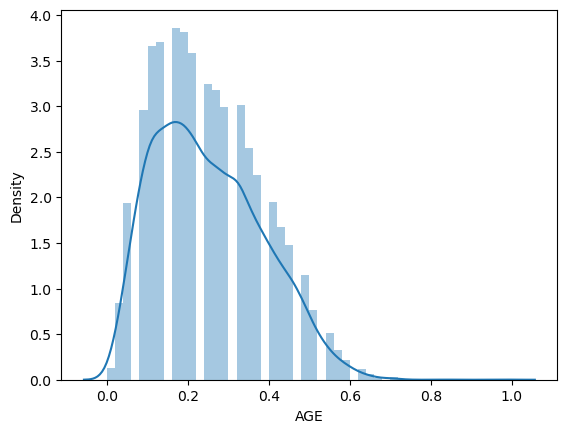

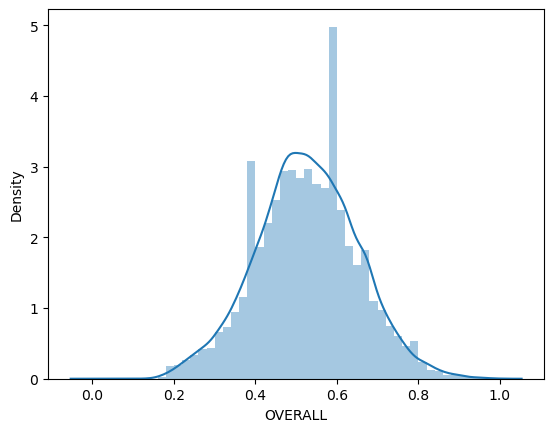

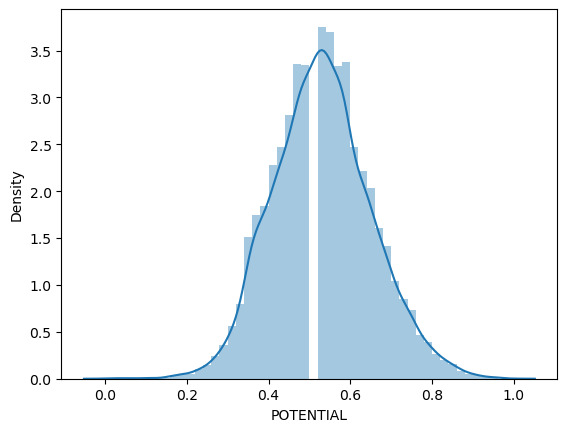

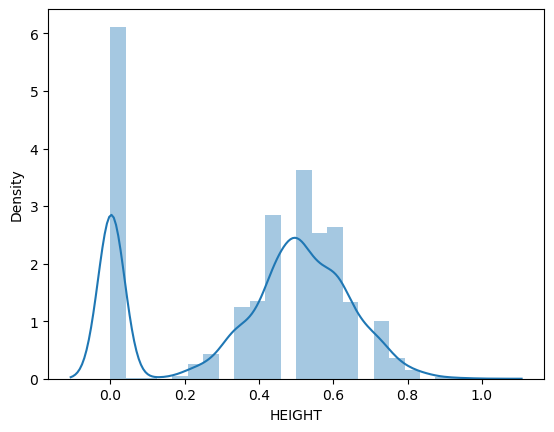

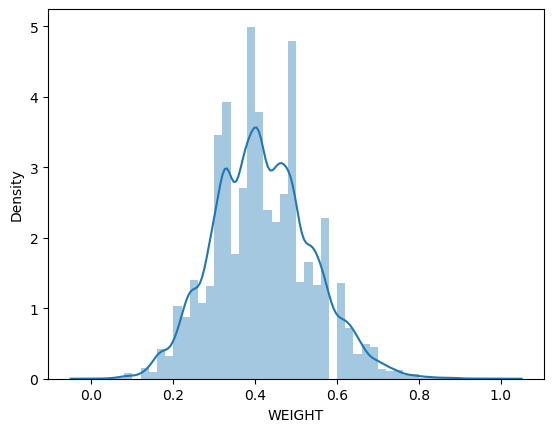

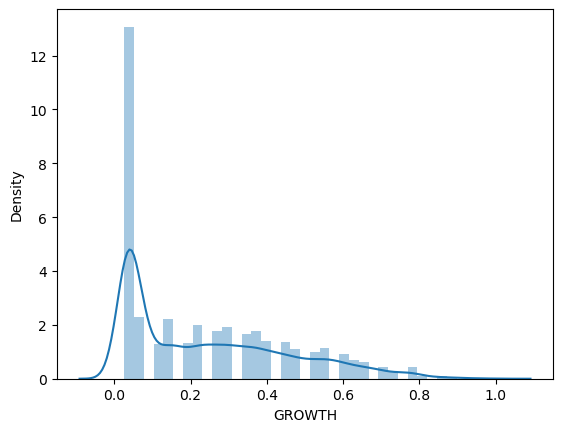

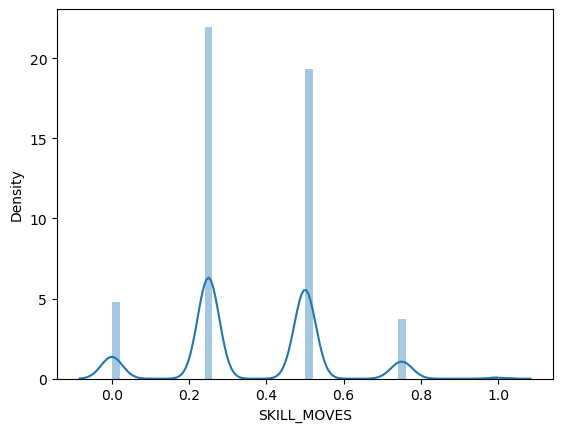

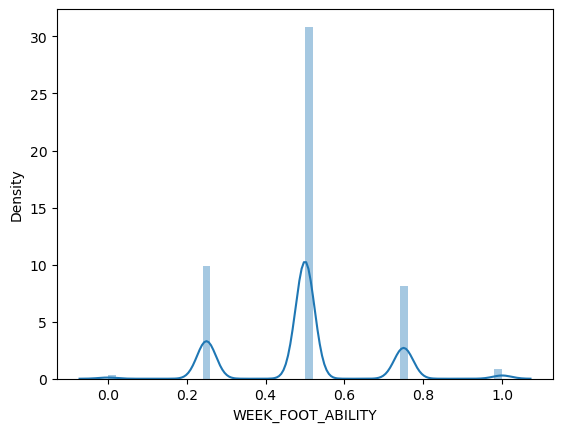

In [25]:
#Range is set between 0 and 1 
#Min Max transformation
transformer = MinMaxScaler().fit(df_numeric_vars) 
x_minmax = transformer.transform(df_numeric_vars) #Array
df_numeric_vars_temp = pd.DataFrame(x_minmax,columns=df_numeric_vars_temp.columns) ## Convert to dataframe


# Print the dristribution plots for the numerical values. 
for column in df_numeric_vars_temp.columns:
    sns.distplot(df_numeric_vars_temp[column])
    plt.show()


In [28]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use with BOX-COX Transformation
df_numeric_vars_tranformed=df_numeric_vars_temp


for column in df_numeric_vars_tranformed.columns:
    df_numeric_vars_tranformed[column] = np.where(df_numeric_vars_tranformed[column]<=0, np.NAN, df_numeric_vars_tranformed[column]) # data['HV1'].mean()
    df_numeric_vars_tranformed[column] = df_numeric_vars_tranformed[column].fillna(df_numeric_vars_tranformed[column].mean())
    transformed_data, _ci = stats.boxcox(df_numeric_vars_tranformed[column])

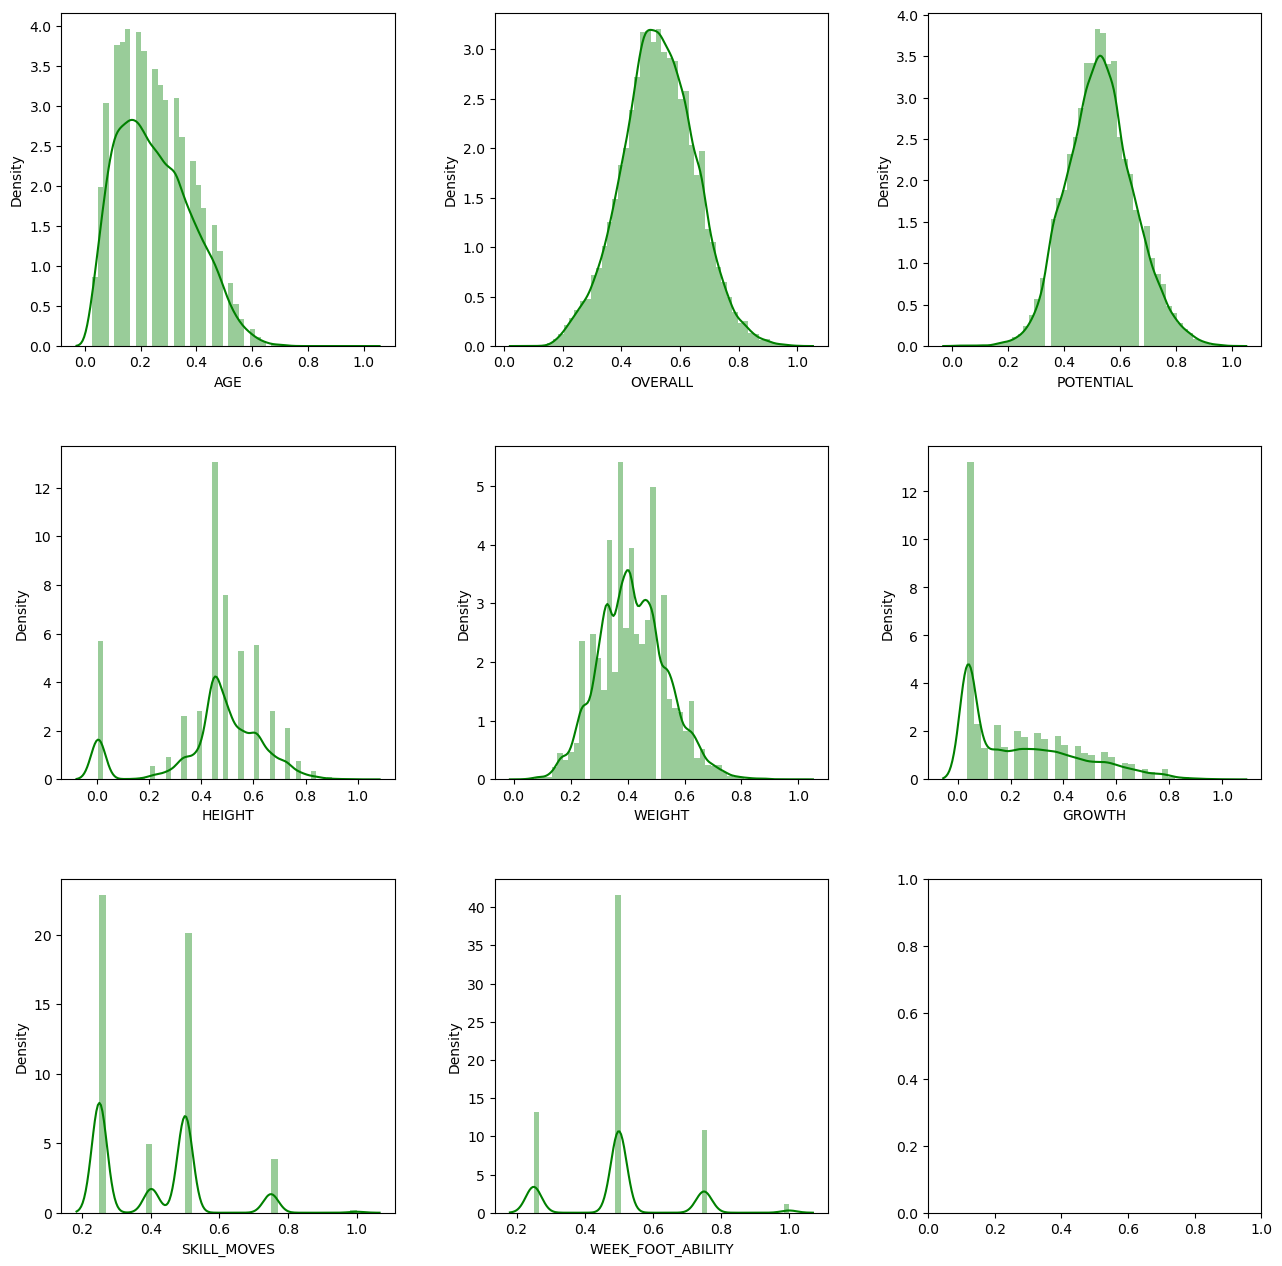

In [29]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_vars_tranformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_vars_tranformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric_vars_tranformed[column], ax=axes[row_idx, col_idx], kde=True, color='green')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

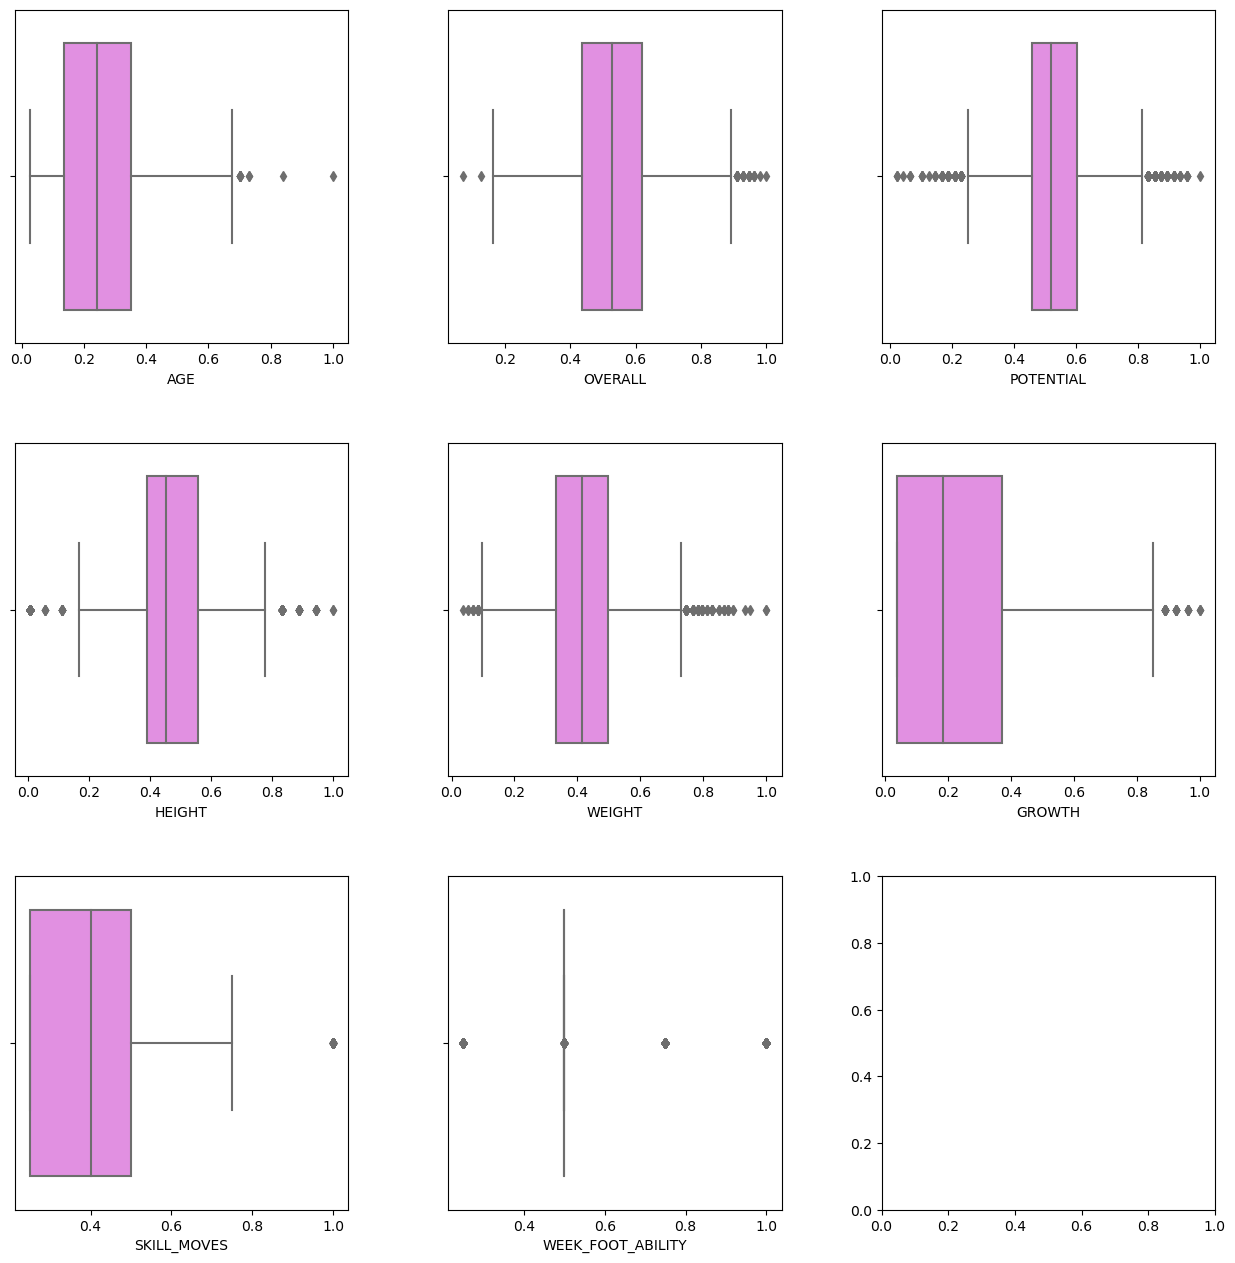

In [30]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_vars_tranformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_vars_tranformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric_vars_tranformed[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [32]:
for column in df_numeric_vars_tranformed.columns:
    iqr = np.percentile(df_numeric_vars_tranformed[column],75) - np.percentile(df_numeric_vars_tranformed[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(df_numeric_vars_tranformed[column],75) + 1.5*iqr
    lower_limit = np.percentile(df_numeric_vars_tranformed[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(df_numeric_vars_tranformed.loc[(df_numeric_vars_tranformed[column]>upper_limit) | (df_numeric_vars_tranformed[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)
    #print(X_num.where((X_num[X_num[column]]<lower_limit) and (X_num[X_num[column]]>lower_limit)).shape())


Feature name:  AGE  | Upper limit:  0.6756756756756757  | Lower limit:  -0.18918918918918926
Number of exclusions would be  13

Feature name:  OVERALL  | Upper limit:  0.890909090909091  | Lower limit:  0.16363636363636347
Number of exclusions would be  31

Feature name:  POTENTIAL  | Upper limit:  0.8229166666666665  | Lower limit:  0.23958333333333348
Number of exclusions would be  297

Feature name:  HEIGHT  | Upper limit:  0.8055555555555551  | Lower limit:  0.13888888888888906
Number of exclusions would be  2113

Feature name:  WEIGHT  | Upper limit:  0.7443609022556389  | Lower limit:  0.0827067669172935
Number of exclusions would be  137

Feature name:  GROWTH  | Upper limit:  0.8703703703703703  | Lower limit:  -0.46296296296296297
Number of exclusions would be  51

Feature name:  SKILL_MOVES  | Upper limit:  0.875  | Lower limit:  -0.125
Number of exclusions would be  67

Feature name:  WEEK_FOOT_ABILITY  | Upper limit:  0.5  | Lower limit:  0.5
Number of exclusions would be 

>Only HEIGHT and GROWTH have a distribution slightly different from a normal. The rest of variables have an appeareance of a normal
>We see that there are some outliers in the variables even if they are not many we keep it.
>Should we exclude 13 from AGE? 

>A standarization is chosen to be performed as a transformation. 

In [33]:
df_numeric_vars_tranformed.sample(5)

AGE   OVERALL  POTENTIAL    HEIGHT    WEIGHT    GROWTH  \
4937  0.243243  0.581818   0.541667  0.611111  0.601504  0.148148   
361   0.540541  0.581818   0.479167  0.777778  0.766917  0.037037   
3046  0.351351  0.581818   0.479167  0.611111  0.601504  0.037037   
1491  0.432432  0.618182   0.520833  0.611111  0.466165  0.037037   
3794  0.324324  0.690909   0.604167  0.388889  0.285714  0.037037   

      SKILL_MOVES  WEEK_FOOT_ABILITY  
4937         0.50               0.50  
361          0.50               0.25  
3046         0.25               0.50  
1491         0.25               0.50  
3794         0.50               0.75

# 04 Train the model

>Finally we create the dataframe to test the model 

We have two dataframes:

    -Target or Y
    -Variables or X

In [34]:
Y=X_Target
X=pd.concat([df_numeric_vars_tranformed, df_object_encoded], axis=1)
X.reset_index()
print(X.shape,Y.shape)

(17125, 22) (17125,)


In [35]:
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# 05 Model Validations and Vizs

In [36]:
#Test model
predictions  = model.predict(X_test)
predictions.shape

(5138,)

In [37]:
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.4664163151154991
RMSE =  3622378.6052043787
MSE =  13121626759442.42


---

Here trying to delete the outliers. The model was not successfull

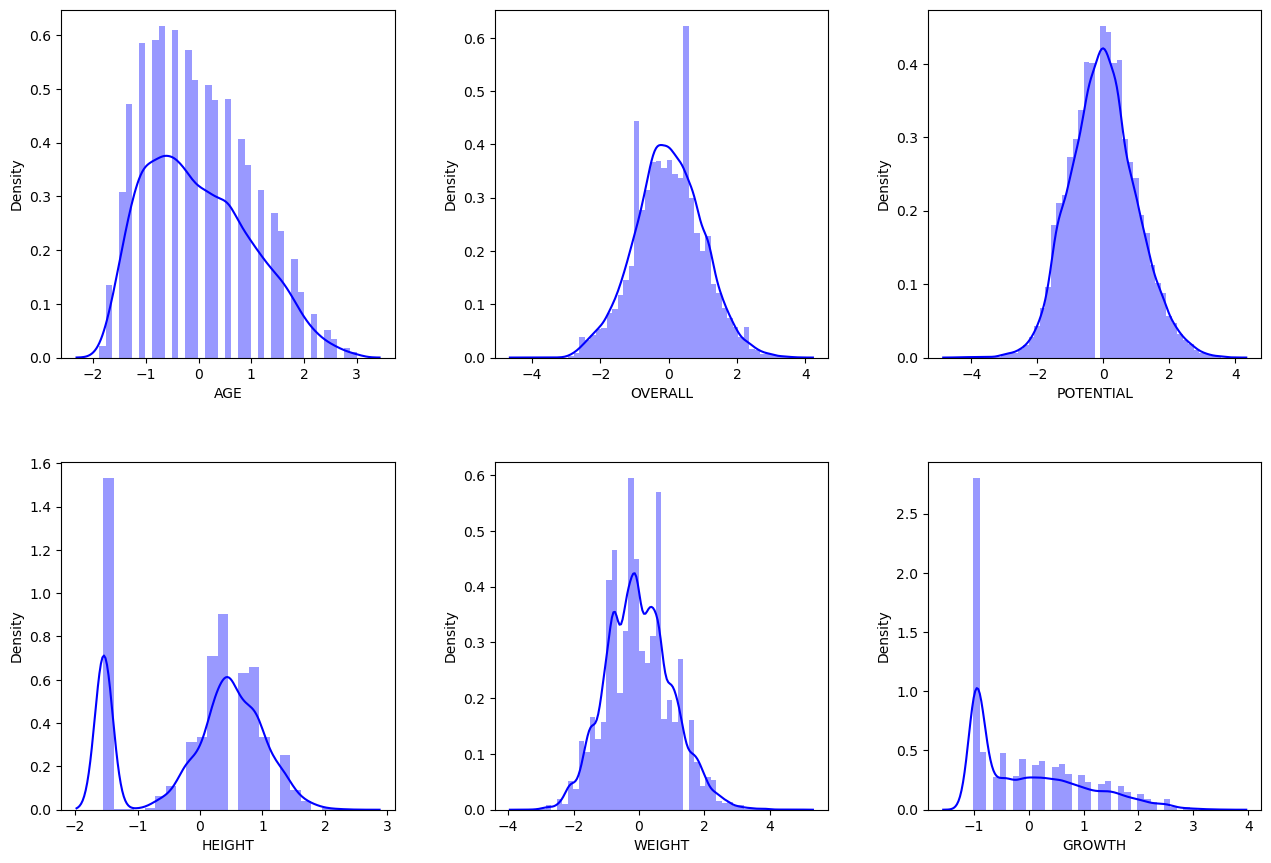

(17125, 12) (17104,)


In [58]:
df_object_selected=df_object[['BEST_POSITION','FOOT']]
df_numeric_selected=df_numeric[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT', 'GROWTH']]
df_MODEL=pd.concat([df_object_selected, df_numeric_selected], axis=1)
df_MODEL.reset_index()
df_MODEL.shape

#Try removing the players with AGE in as outliers
# remove them from the data
iqr = np.percentile(df_MODEL['AGE'],75) - np.percentile(df_MODEL['AGE'],25) # data['IC1'].quantile(0.75)
iqr
# define the limits
upper_limit = np.percentile(df_MODEL['AGE'],75) + 1.5*iqr
lower_limit = np.percentile(df_MODEL['AGE'],25) - 1.5*iqr
df_MODEL = df_MODEL[(df_numeric['AGE']>lower_limit) & (df_MODEL['AGE']<upper_limit)]


df_object_selected=df_MODEL[['BEST_POSITION','FOOT']]
df_numeric_selected=df_MODEL[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT', 'GROWTH']]

#I split VALUEt and the rest of numerical values to apply the scalers
X_Target=df_numeric_selected['VALUE']
df_numeric_Transformed=df_numeric_selected.drop(columns='VALUE')
df_numeric_Transformed.sample(4)

#Show the distributions in as a Standarized distribution. 
##There are different methods to do this transformation
#I use Standarization Standar_scaler to put the mean in 0

transformer = StandardScaler().fit(df_numeric_Transformed)
df_numeric_Transformed_2 = transformer.transform(df_numeric_Transformed)
df_numeric_Transformed = pd.DataFrame(df_numeric_Transformed_2, columns=df_numeric_Transformed.columns)

# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_Transformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid


# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_Transformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric_Transformed[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

# Use the replace() method to map old categories to new categories
df_object_selected["BEST_POSITION"] = df_object_selected["BEST_POSITION"].replace(bp_mapping)
#df_object_selected.head()
df_object_selected["BEST_POSITION"].unique()
df_object_encoded = pd.get_dummies(df_object_selected, drop_first=False)
df_object_encoded.sample(5)

Y=X_Target
X=pd.concat([df_numeric_Transformed, df_object_encoded], axis=1)
X.reset_index()
print(X.shape,Y.shape)

In [59]:
Y=X_Target
X=pd.concat([df_numeric_Transformed, df_object_encoded], axis=1)
X.reset_index()
print(X.shape,Y.shape)
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

(17125, 12) (17104,)


ValueError: Found input variables with inconsistent numbers of samples: [17125, 17104]